# TODO
  ## 1) add the functions of k-mean to loop 
  ## 2) add function to check if the centroids keep moving 

def find_centers(x, k):
    # Initialize to K random centers
    random.seed()
    mu=randomclusterscentroids=10*np.random.randn(k, 2)-5
    oldcenters =np.random.randn(2*K, 2)
    while not has_converged(mu, oldcenters):
        oldcenters = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(clusters)
    return(mu,clusters)    

In [70]:
%pylab inline
from scipy.linalg import norm, pinv
import numpy as np
import math

Populating the interactive namespace from numpy and matplotlib


In [71]:
# Usage: data = dbmoon(N, d, r, w)
# doublemoon.m - genereate the double moon data set in Haykin's book titled
# "neural networks and learning machine" third edition 2009 Pearson
# Figure 1.8 pp.61
# The data set contains two regions A and B representing 2 classes
# each region is a half ring with radius r = 10, width = 6, one is upper
# half and the other is lower half
# d: distance between the two regions
# will generate region A centered at (0, 0) and region B is a mirror image
# of region A (w.r.t.x axis) with a (r, d) shift of origin
# N:  # of samples each class, default = 1000
# d: seperation of two class, negative value means overlapping (default=1)
# r: radius (default=10), w: width of ring (default=6)
def dbmoon(N=1000, d=1, r=10, w=6):
    # clear all; close all;
    # generate region A:
    # first generate a uniformly random distributed data points from (-r-w / 2, 0)
    # to (r+w / 2, r+w / 2)
    N1 = 10 * N  # generate more points and select those meet criteria
    w2 = w / 2
    done = 0
    tmp1 = np.array([[]])
    while not done:
        tmp = np.array(2 * (r + w2) * (np.random.uniform(0, 1, (N1, 1)) - 0.5))
        tmp = np.column_stack((tmp, (r + w2) * np.random.uniform(0, 1, (N1, 1))))
        # 3rd column of tmp is the magnitude of each data point
        thirdCol = np.sqrt(np.multiply(tmp[:, 0], tmp[:, 0]) + np.multiply(tmp[:, 1], tmp[:, 1]))
        tmp = np.column_stack((tmp, thirdCol.T))
        idx = np.nonzero(np.logical_and((tmp[:, 2] > (r - w2)), (tmp[:, 2] < (r + w2))))
        if tmp1.shape == (1, 0):
            tmp1 = tmp[:, 0:2][idx]
        else:
            tmp1 = np.row_stack((tmp1, tmp[:, 0:2][idx]))
        if len(idx[0]) >= N:
            done = 1
            # if not enough data point, generate more and test

    # region A data and class label 0
    # region B data is region A data flip y coordinate - d, and x coordinate +r
    data = np.column_stack((tmp1[0:N, :], np.zeros((N, 1))))
    data1 = np.column_stack(((tmp1[0:N, 0] + r), (-tmp1[0:N, 1] - d), np.ones((N, 1))))
    data = np.row_stack((data, data1))
    #plot(data(1:N, 1), data(1:N, 2), '.r', data(N+1:end, 1), data(N+1:end, 2), '.b');
    # title(['Fig. 1.8 Double moon data set, d = ' num2str(d)]),
    # axis([-r-w2 2 * r+w2 -r-w2-d r+w2])
    return data

In [72]:
N=1000
dbmoon = dbmoon(N)
random.seed()
clusterskpoints=10*np.random.randn(4, 2)-5

In [73]:
def create_clusters(x,clusterskpoints):
    clusters={}
    a=[]
    for i in enumerate(x):
        mindistk=0
        mindist=100000000
        for j in enumerate(clusterskpoints):
            distance= norm(i[1]-j[1])
            if distance<mindist : 
                mindistk=j[0]
                mindist=distance   
        try:   
            a=clusters[mindistk]
            a = vstack((a,i[1]))
            clusters[mindistk] =a
        except KeyError:
            clusters[mindistk] = i[1]
    return clusters

In [74]:
def recenter(clusters):
    newmu = np.empty((0,2), int)
    keys = sorted(clusters.keys())
    
    for k in keys:
        n= np.mean(clusters[k], axis = 0)
        newmu=vstack((newmu,n))
    return newmu

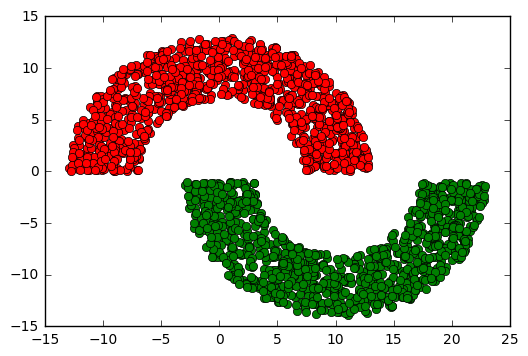

In [75]:
plot(dbmoon[0:N,0], dbmoon[0:N,1], 'ro',dbmoon[N:,0], dbmoon[N:,1], 'go')
show()

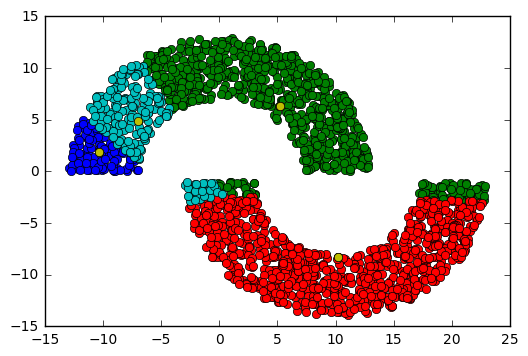

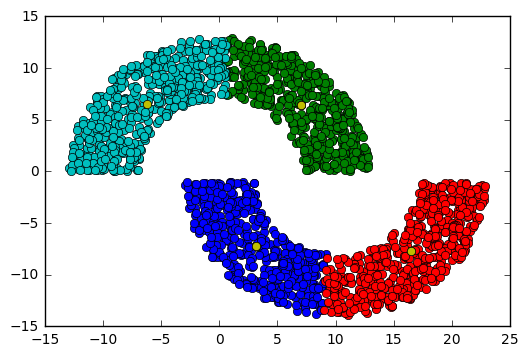

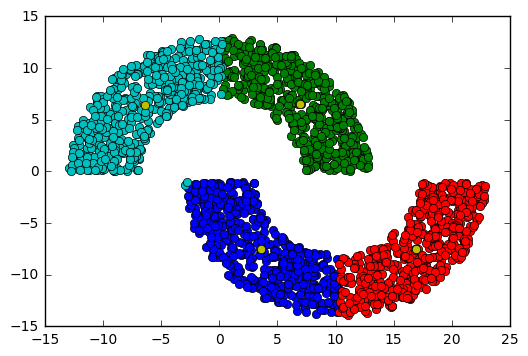

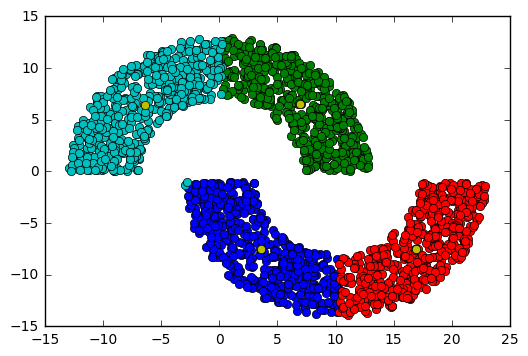

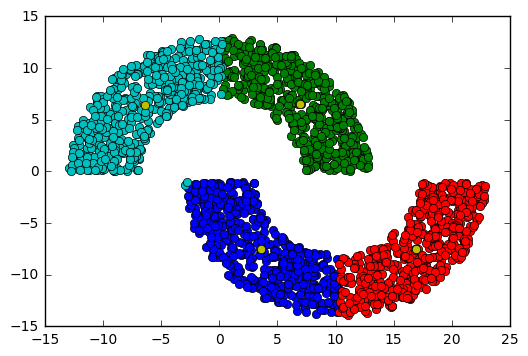

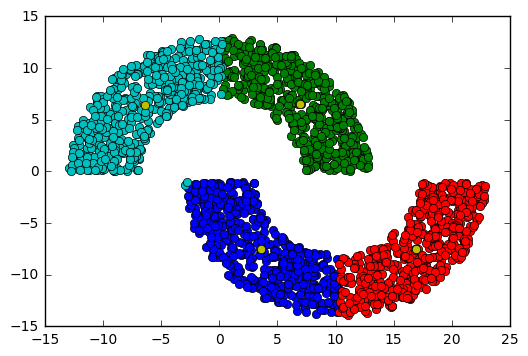

In [76]:
#plot(clusters[K][:N,:1],clusters[K][:N,1:2],'o')
#plot(clusterskpoints[0:2*N,0], clusterskpoints[0:2*N,1], 'yo')
show()
for i in range(51):
    clusters=create_clusters(dbmoon[:,:2],clusterskpoints)
    clusterskpoints=recenter(clusters)
    if i%10 == 0 :
        keys = sorted(clusters.keys())  
        for K in keys:
            plot(clusters[K][:N,:1],clusters[K][:N,1:2],'o')
            plot(clusterskpoints[0:2*N,0], clusterskpoints[0:2*N,1], 'yo')
            #print " itteration number :" , i
            #print " "
        show()

In [77]:
def get_dmax(clusterskpoints):
    d= []
    for i in enumerate(clusterskpoints):
        for j in enumerate(clusterskpoints):
            d.append(norm(i[1]-j[1]))
    return max(d)

In [79]:
nclusters = len(clusters.keys())
dmax= get_dmax(clusterskpoints)
variance = (dmax**2)/(2*nclusters)
#generate random W matrix accourding to the number of the clusters
#def output(x , k):
x=dbmoon[0:2*N,0:2]
d=dbmoon[0:2*N,2]
w = random.randn(nclusters,1)
net= norm(x[0]-clusterskpoints)
var1=-1/2*variance

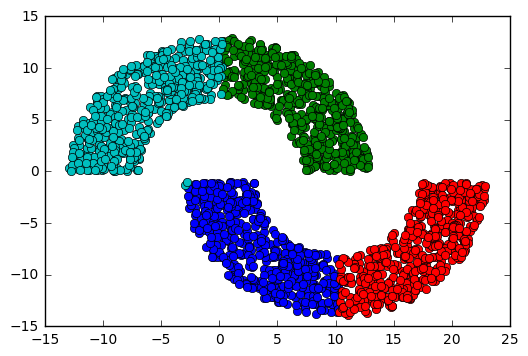

In [80]:
#smart plot 
keys = sorted(clusters.keys())  
for K in keys:
    plot(clusters[K][:N,:1],clusters[K][:N,1:2],'o')
